In [10]:
import os, glob
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

from acrg.name import name

import apo_funcs, apo_plot_info

In [20]:
year = 2016

colors = {'carbontracker': 'dodgerblue',
          'NAME': 'darkorange'}

start_dates = {month: datetime(year, month, 1) for month in range(1, 13)}
end_dates = {month: start_date + relativedelta(months=1, seconds=-1) for month, start_date in start_dates.items()}

## Import Carbon Tracker model

In [21]:
file_path = os.path.join('/user', 'work', 'vf20487', 'Data')
file_name = glob.glob(os.path.join(file_path, f'co2_wao*.nc'))[0]
file_name

'/user/work/vf20487/Data/co2_wao_surface-insitu_13_allvalid.nc'

In [22]:
data = name.open_ds(file_name)
data

<xarray.Dataset>
Dimensions:                                 (obs: 48352,
                                             calendar_components: 6,
                                             dim_concerns: 6, mip_nmodels: 17,
                                             nmembers: 5)
Dimensions without coordinates: obs, calendar_components, dim_concerns,
                                mip_nmodels, nmembers
Data variables: (12/40)
    time                                    (obs) datetime64[ns] 2007-10-31T1...
    start_time                              (obs) datetime64[ns] 2007-10-31T1...
    midpoint_time                           (obs) datetime64[ns] 2007-10-31T1...
    datetime                                (obs) |S100 b'2007-10-31T15:30:00...
    time_decimal                            (obs) float64 2.008e+03 ... 2.02e+03
    time_components                         (obs, calendar_components) float64 ...
    ...                                      ...
    modelsamplesmean                        (obs) float32 0.0003686 ... 9.969...
    modelsamplesmean_forecast               (obs) float32 9.969e+36 ... 9.969...
    modelsamplesstandarddeviation           (obs) float32 1.836e-05 ... 9.969...
    modelsamplesstandarddeviation_forecast  (obs) float32 9.969e+36 ... 9.969...
    modelsamplesensemble                    (obs, nmembers) float32 0.0003686...
    modelsamplesensemble_forecast           (obs, nmembers) float32 9.969e+36...
Attributes: (12/101)
    site_code:                                    WAO
    site_name:                                    Weybourne, Norfolk
    site_country:                                 United Kingdom
    site_country_flag:                            UNKG0001.GIF
    site_latitude:                                52.9502
    site_longitude:                               1.1219
    ...                                           ...
    Caution:                                      ===========================...
    History:                                      \nOriginal observation file...
    CTDAS_info:                                   Simulated values added from...
    CTDAS_startdate:                              2007-10-27
    CTDAS_enddate:                                2022-01-30
    original_file:                                /mnt/beegfs/user/gkoren/ctd...

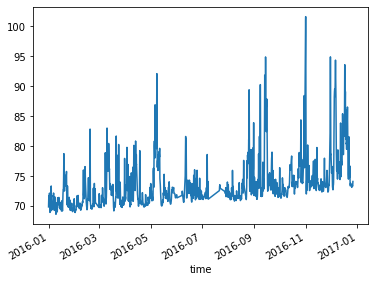

In [23]:
model = xr.DataArray(data=data['modelsamplesensemble'].sel(nmembers=1).values,
                     coords={'time': data.time.values})
model = model*1e6
model.sel(time=str(year)).plot()


In [9]:
data

<xarray.Dataset>
Dimensions:                                 (obs: 48352,
                                             calendar_components: 6,
                                             dim_concerns: 6, mip_nmodels: 17,
                                             nmembers: 5)
Dimensions without coordinates: obs, calendar_components, dim_concerns,
                                mip_nmodels, nmembers
Data variables: (12/40)
    time                                    (obs) datetime64[ns] 2007-10-31T1...
    start_time                              (obs) datetime64[ns] 2007-10-31T1...
    midpoint_time                           (obs) datetime64[ns] 2007-10-31T1...
    datetime                                (obs) |S100 b'2007-10-31T15:30:00...
    time_decimal                            (obs) float64 2.008e+03 ... 2.02e+03
    time_components                         (obs, calendar_components) float64 ...
    ...                                      ...
    modelsamplesmean                        (obs) float32 0.0003686 ... 9.969...
    modelsamplesmean_forecast               (obs) float32 9.969e+36 ... 9.969...
    modelsamplesstandarddeviation           (obs) float32 1.836e-05 ... 9.969...
    modelsamplesstandarddeviation_forecast  (obs) float32 9.969e+36 ... 9.969...
    modelsamplesensemble                    (obs, nmembers) float32 0.0003686...
    modelsamplesensemble_forecast           (obs, nmembers) float32 9.969e+36...
Attributes: (12/101)
    site_code:                                    WAO
    site_name:                                    Weybourne, Norfolk
    site_country:                                 United Kingdom
    site_country_flag:                            UNKG0001.GIF
    site_latitude:                                52.9502
    site_longitude:                               1.1219
    ...                                           ...
    Caution:                                      ===========================...
    History:                                      \nOriginal observation file...
    CTDAS_info:                                   Simulated values added from...
    CTDAS_startdate:                              2007-10-27
    CTDAS_enddate:                                2022-01-30
    original_file:                                /mnt/beegfs/user/gkoren/ctd...

## Import NAME model

In [24]:
ts_data_all = apo_funcs.get_timeseries(sites=['WAO'], year=year, sources=['ff'])

Finding timeseries for WAO
ff: []


KeyError: 'ocean'

## Plot both

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

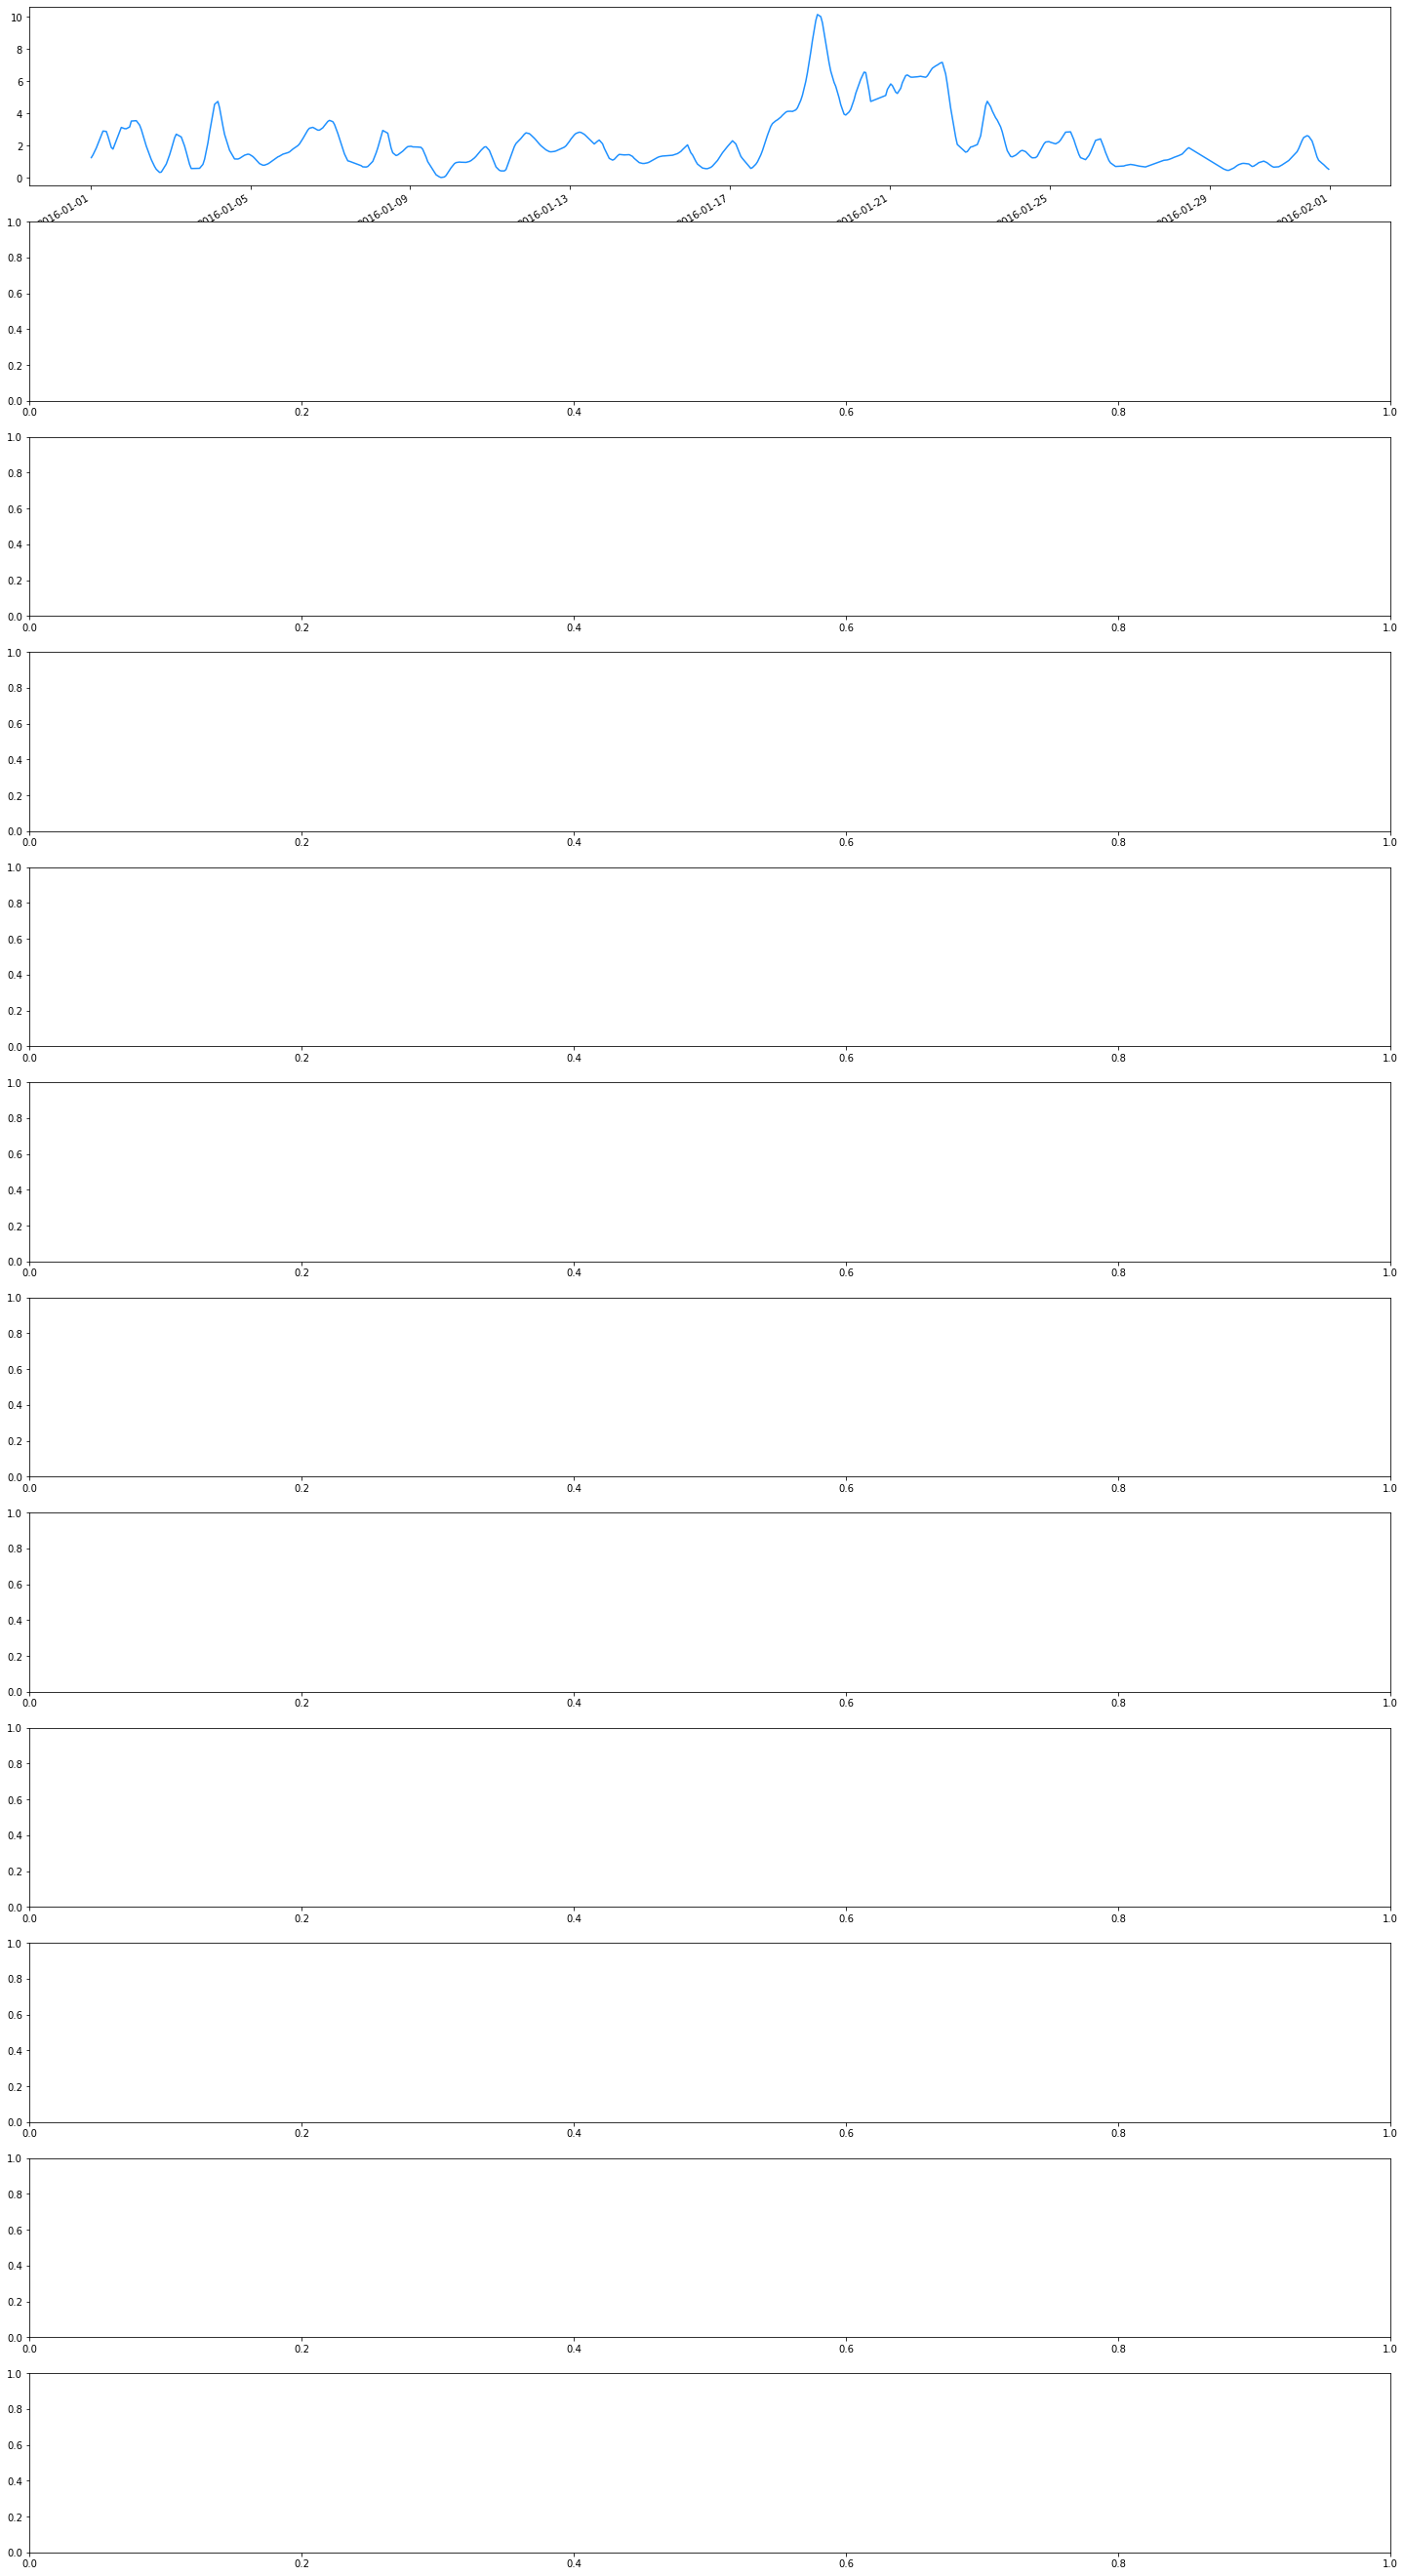

In [25]:
fig, axes = plt.subplots(ncols=1, nrows=12, figsize=(25, 4*12))

for month, start in start_dates.items():
    ax = axes.flat[month-1]
    model_month = model.sel(time=slice(start, end_dates[month]))
    if len(model_month)>0:
        model_month = model_month - model_month.min()
        model_month.plot(ax=ax, color=colors['carbontracker'], label='C. Tracker')
    ts_data_all['WAO']['co2_ff'].sel(time=slice(start, end_dates[month])).plot(ax=ax, color=colors['NAME'], label='NAME')

    ylabel = ax.set_ylabel('')
    xlabel = ax.set_xlabel('')

    legend = ax.legend(loc='upper right',  fontsize=20)

myFmt = mdates.DateFormatter('%d')
[ax.xaxis.set_major_formatter(myFmt) for ax in axes]
ticks = [ax.tick_params(labelsize=20, labelrotation=0) for ax in axes]
# ticks = [axes[ii].xaxis.set_ticklabels([]) for ii in range(len(axes)) if ii!=11]
text = [axes[mm].text(0.005, 0.985, f'{apo_plot_info.month_names[month]} {year}', transform=axes[mm].transAxes, va='top', fontsize=20)
        for mm, month in enumerate(range(1, 13))]
ylabel = fig.text(0.09, 0.5, r'FF regional contribution, $\mu$ mol/mol', va='center', ha='center', rotation='vertical', fontsize=25)

## Compare with low res NAME footprint

In [9]:
footprint = name.footprints(sitecode_or_filename='WAO',
                            domain='EUROPE',
                            met_model='UKV',
                            start='2015-01-01',
                            end='2016-01-01')

No lifetime defined in species_info.json or species not defined. WARNING: 30-day integrated footprint used without chemical loss.
No lifetime defined in species_info.json or species not defined. WARNING: 30-day integrated footprint used without chemical loss.
No lifetime defined in species_info.json or species not defined. WARNING: 30-day integrated footprint used without chemical loss.
No lifetime defined in species_info.json or species not defined. WARNING: 30-day integrated footprint used without chemical loss.
No lifetime defined in species_info.json or species not defined. WARNING: 30-day integrated footprint used without chemical loss.
No lifetime defined in species_info.json or species not defined. WARNING: 30-day integrated footprint used without chemical loss.
No lifetime defined in species_info.json or species not defined. WARNING: 30-day integrated footprint used without chemical loss.
No lifetime defined in species_info.json or species not defined. WARNING: 30-day integrate

In [11]:
emissions = name.flux(domain='EUROPE',
                      species='co2-edgar-ukghg-ff-1hr',
                      start='2015-01-01',
                      end='2016-01-01',
                      chunks={'time': 50})


Searching for flux files: /group/chemistry/acrg/LPDM/emissions/EUROPE/co2-edgar-ukghg-ff-1hr_*.nc
Reading and concatenating files: 
/group/chemistry/acrg/LPDM/emissions/EUROPE/co2-edgar-ukghg-ff-1hr_EUROPE_2015.nc
/group/chemistry/acrg/LPDM/emissions/EUROPE/co2-edgar-ukghg-ff-1hr_EUROPE_2016.nc
Slicing time to range 2015-01-01 00:00:00 - 2015-12-31 23:59:59


In [12]:
mf = (footprint.fp * emissions.flux).sum(dim=['lat', 'lon'])

/user/home/vf20487/.conda/envs/acrg/lib/python3.10/site-packages/xarray/core/indexing.py:1234: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


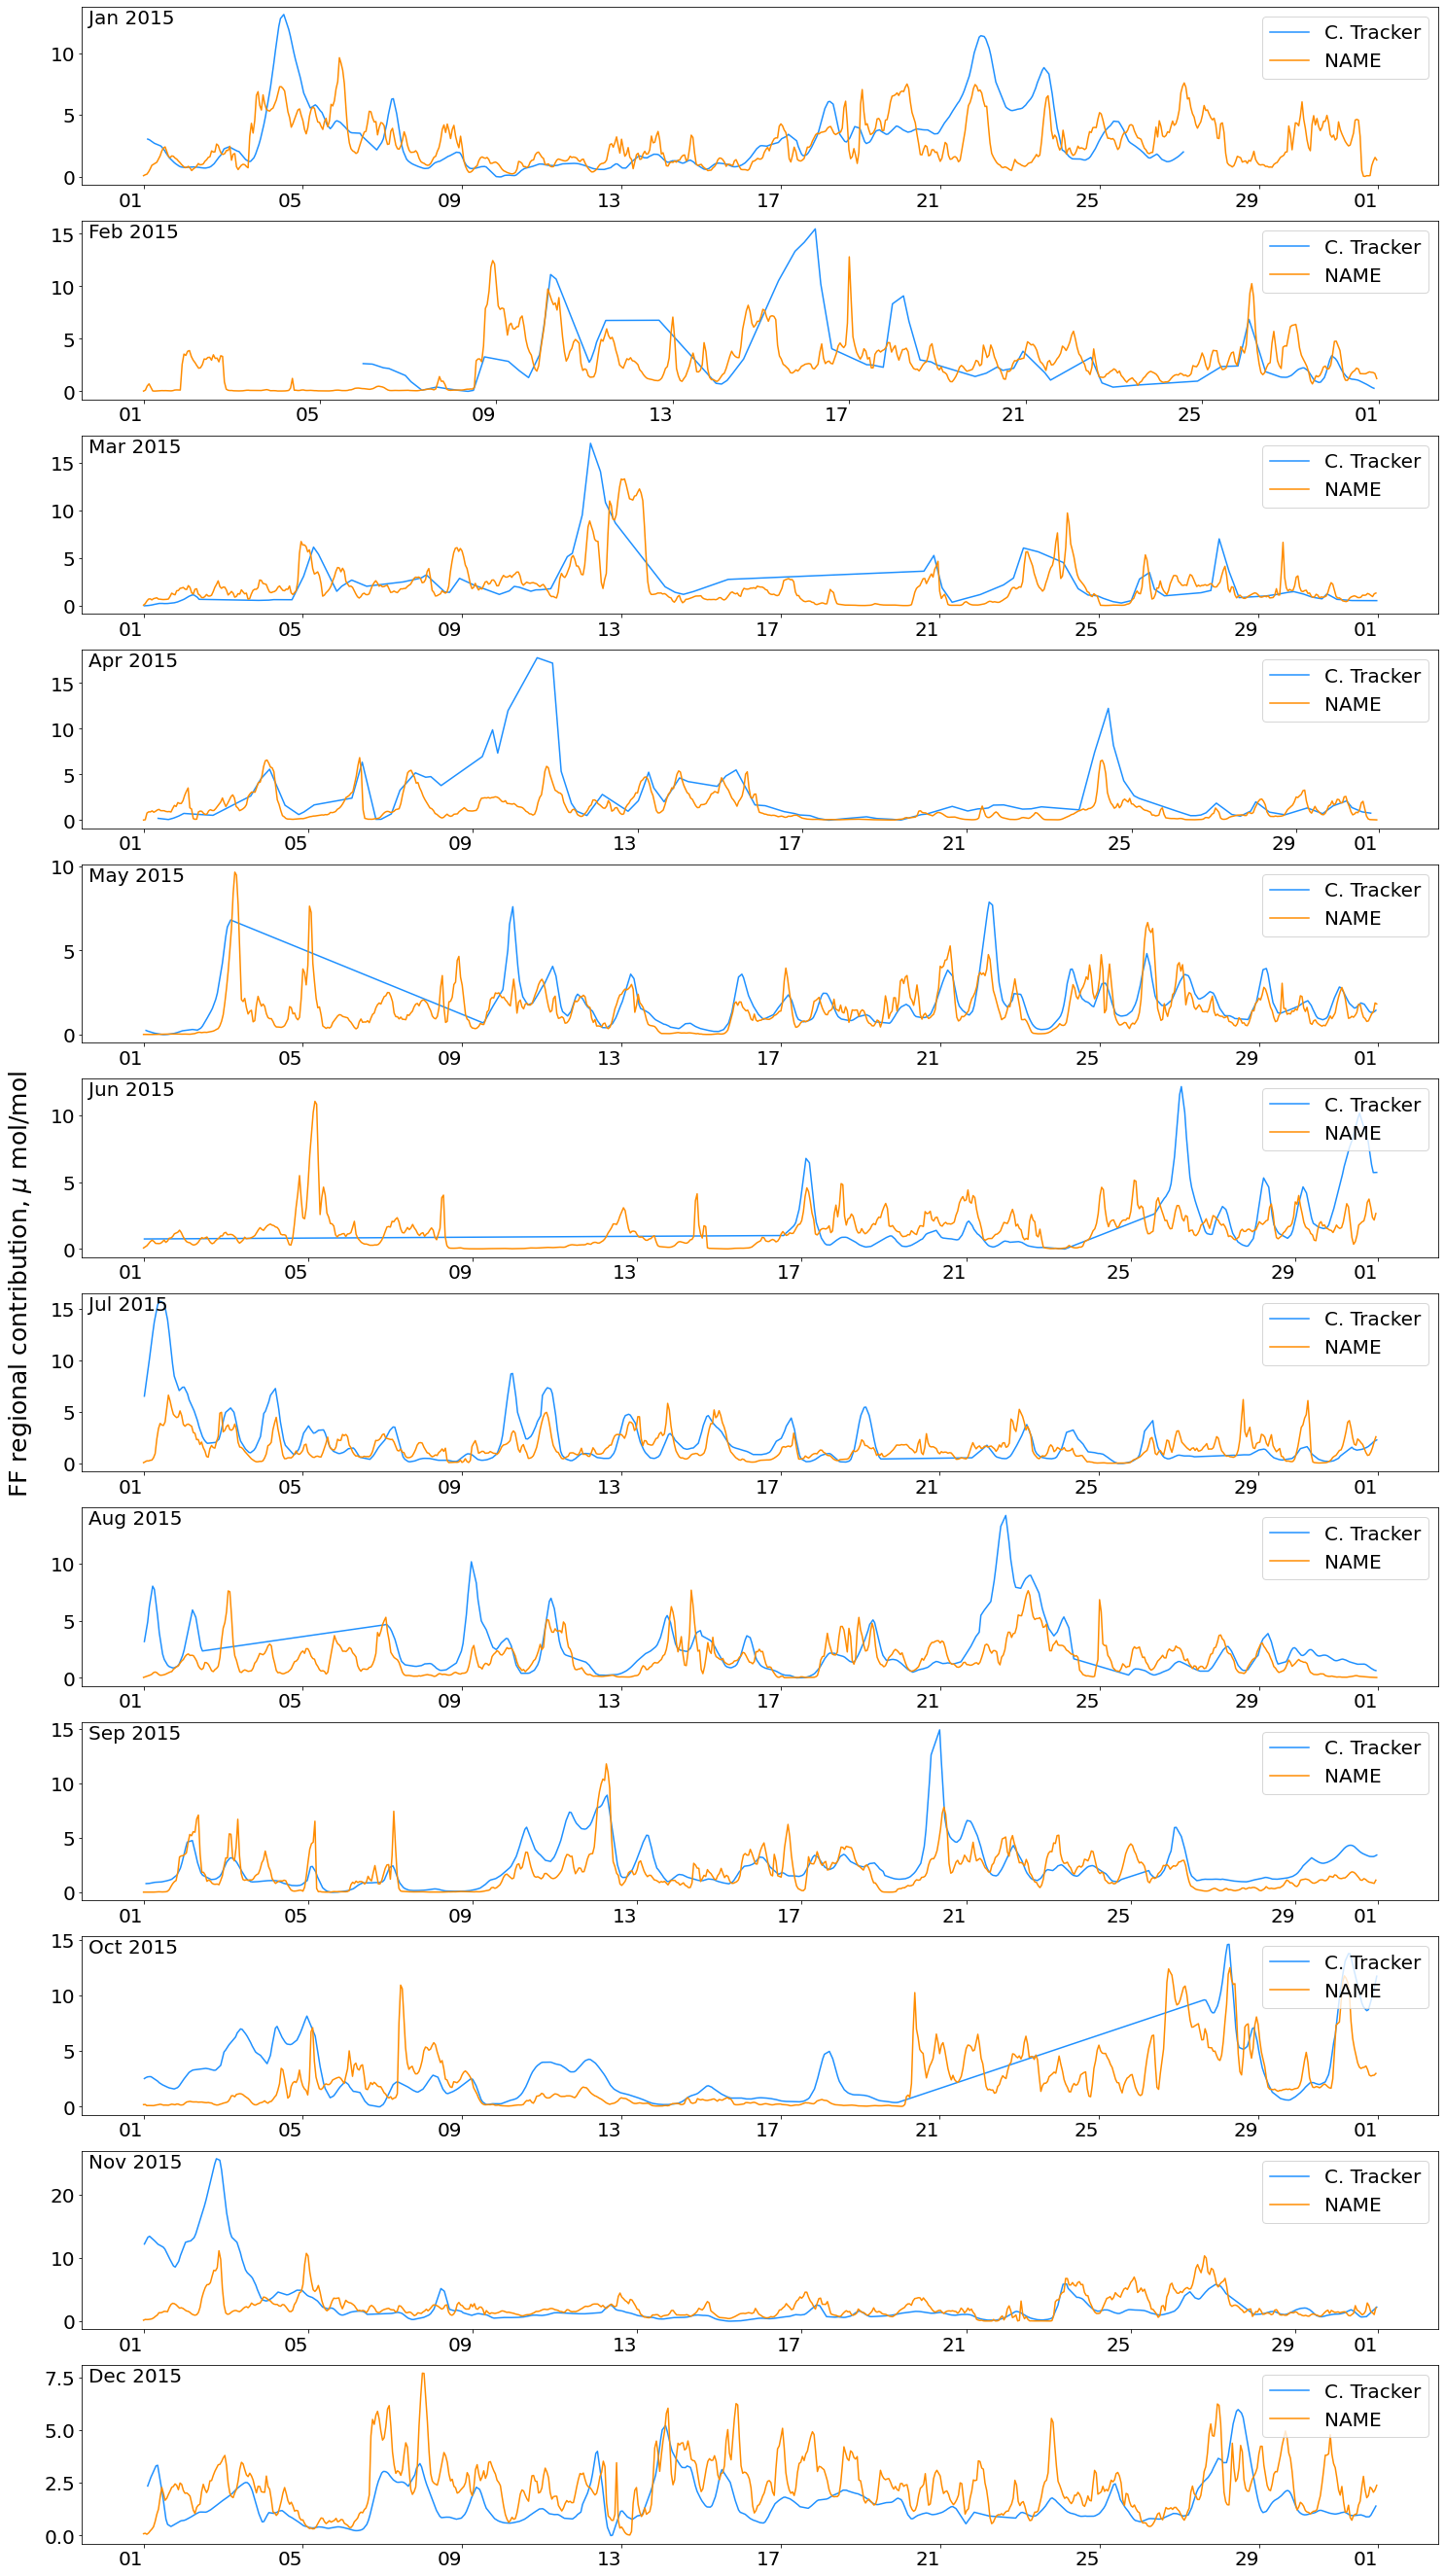

In [14]:
fig, axes = plt.subplots(ncols=1, nrows=12, figsize=(25, 4*12))

for month, start in start_dates.items():
    ax = axes.flat[month-1]
    model_month = model.sel(time=slice(start, end_dates[month]))
    model_month = model_month - model_month.min()
    model_month.plot(ax=ax, color=colors['carbontracker'], label='C. Tracker')
    ts_data_all['WAO']['co2_ff'].sel(time=slice(start, end_dates[month])).plot(ax=ax, color=colors['NAME'], label='NAME')

    ylabel = ax.set_ylabel('')
    xlabel = ax.set_xlabel('')

    legend = ax.legend(loc='upper right',  fontsize=20)

myFmt = mdates.DateFormatter('%d')
[ax.xaxis.set_major_formatter(myFmt) for ax in axes]
ticks = [ax.tick_params(labelsize=20, labelrotation=0) for ax in axes]
# ticks = [axes[ii].xaxis.set_ticklabels([]) for ii in range(len(axes)) if ii!=11]
text = [axes[mm].text(0.005, 0.985, f'{apo_plot_info.month_names[month]} {year}', transform=axes[mm].transAxes, va='top', fontsize=20)
        for mm, month in enumerate(range(1, 13))]
ylabel = fig.text(0.09, 0.5, r'FF regional contribution, $\mu$ mol/mol', va='center', ha='center', rotation='vertical', fontsize=25)